In [14]:
# some packages are not needed but these are what I usually use
# i wasn't able to filter which ones are not needed
from netCDF4 import Dataset
import matplotlib.pyplot as plt
#from matplotlib.cm import get_cmap
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import NaturalEarthFeature, COLORS
#from matplotlib.patches import Polygon
#from matplotlib.colors import from_levels_and_colors
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib import colors
#from matplotlib.colors import ListedColormap
#from matplotlib.colors import LinearSegmentedColormap
#import matplotlib.patheffects as pe
from mpl_toolkits.basemap import Basemap, maskoceans
#import matplotlib.ticker as plticker
#import matplotlib.patches as patches
#from matplotlib import ticker
#from datetime import datetime, timedelta
import numpy as np
#import pandas as pd

#mpl.rcParams['figure.dpi'] = 300


In [2]:
exp='FLAT3_v1' # kindly refer to your file directory (f variable line here)
folder = 'v1'

# indicate the min and max lat lon of the area where you want to flatten
latstart1 = 6
latend1 = 8
lonstart1 = 124
lonend1 = 126

proj=crs.PlateCarree()

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
          'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
           cmap(np.linspace(minval, maxval, n)))
    return new_cmap   


In [3]:
# if you want to change your terrain on each domain, you have to perform this process
# on each geo_em file (e.g., geo_em.d01, geo_em.d02)
f = Dataset('/mnt/reiwa/cathrene/pre_proc/proc_terrain/APR2022/'+ folder +'/geo_em.d02_'+ exp +'.nc', mode='r+')

xlat = f.variables['XLAT_M'][:]
xlon = f.variables['XLONG_M'][:]
hgt = f.variables['HGT_M'][:]
e_we = len(f.dimensions['west_east'])
e_sn = len(f.dimensions['south_north'])

for j in range(e_sn):
        for i in range(e_we):
                if xlat[0,j,i] >= latstart1 and xlat[0,j,i] <= latend1 and \
                   xlon[0,j,i] >= lonstart1 and xlon[0,j,i] <= lonend1:
                        hgt[0,j,i] = 10 # flatten to 10-m !!!


f.variables['HGT_M'][:] = hgt # important line to directly replace values on your geo_em file

# can be copied to .py files up to this line!!!

NameError: name 'coast' is not defined

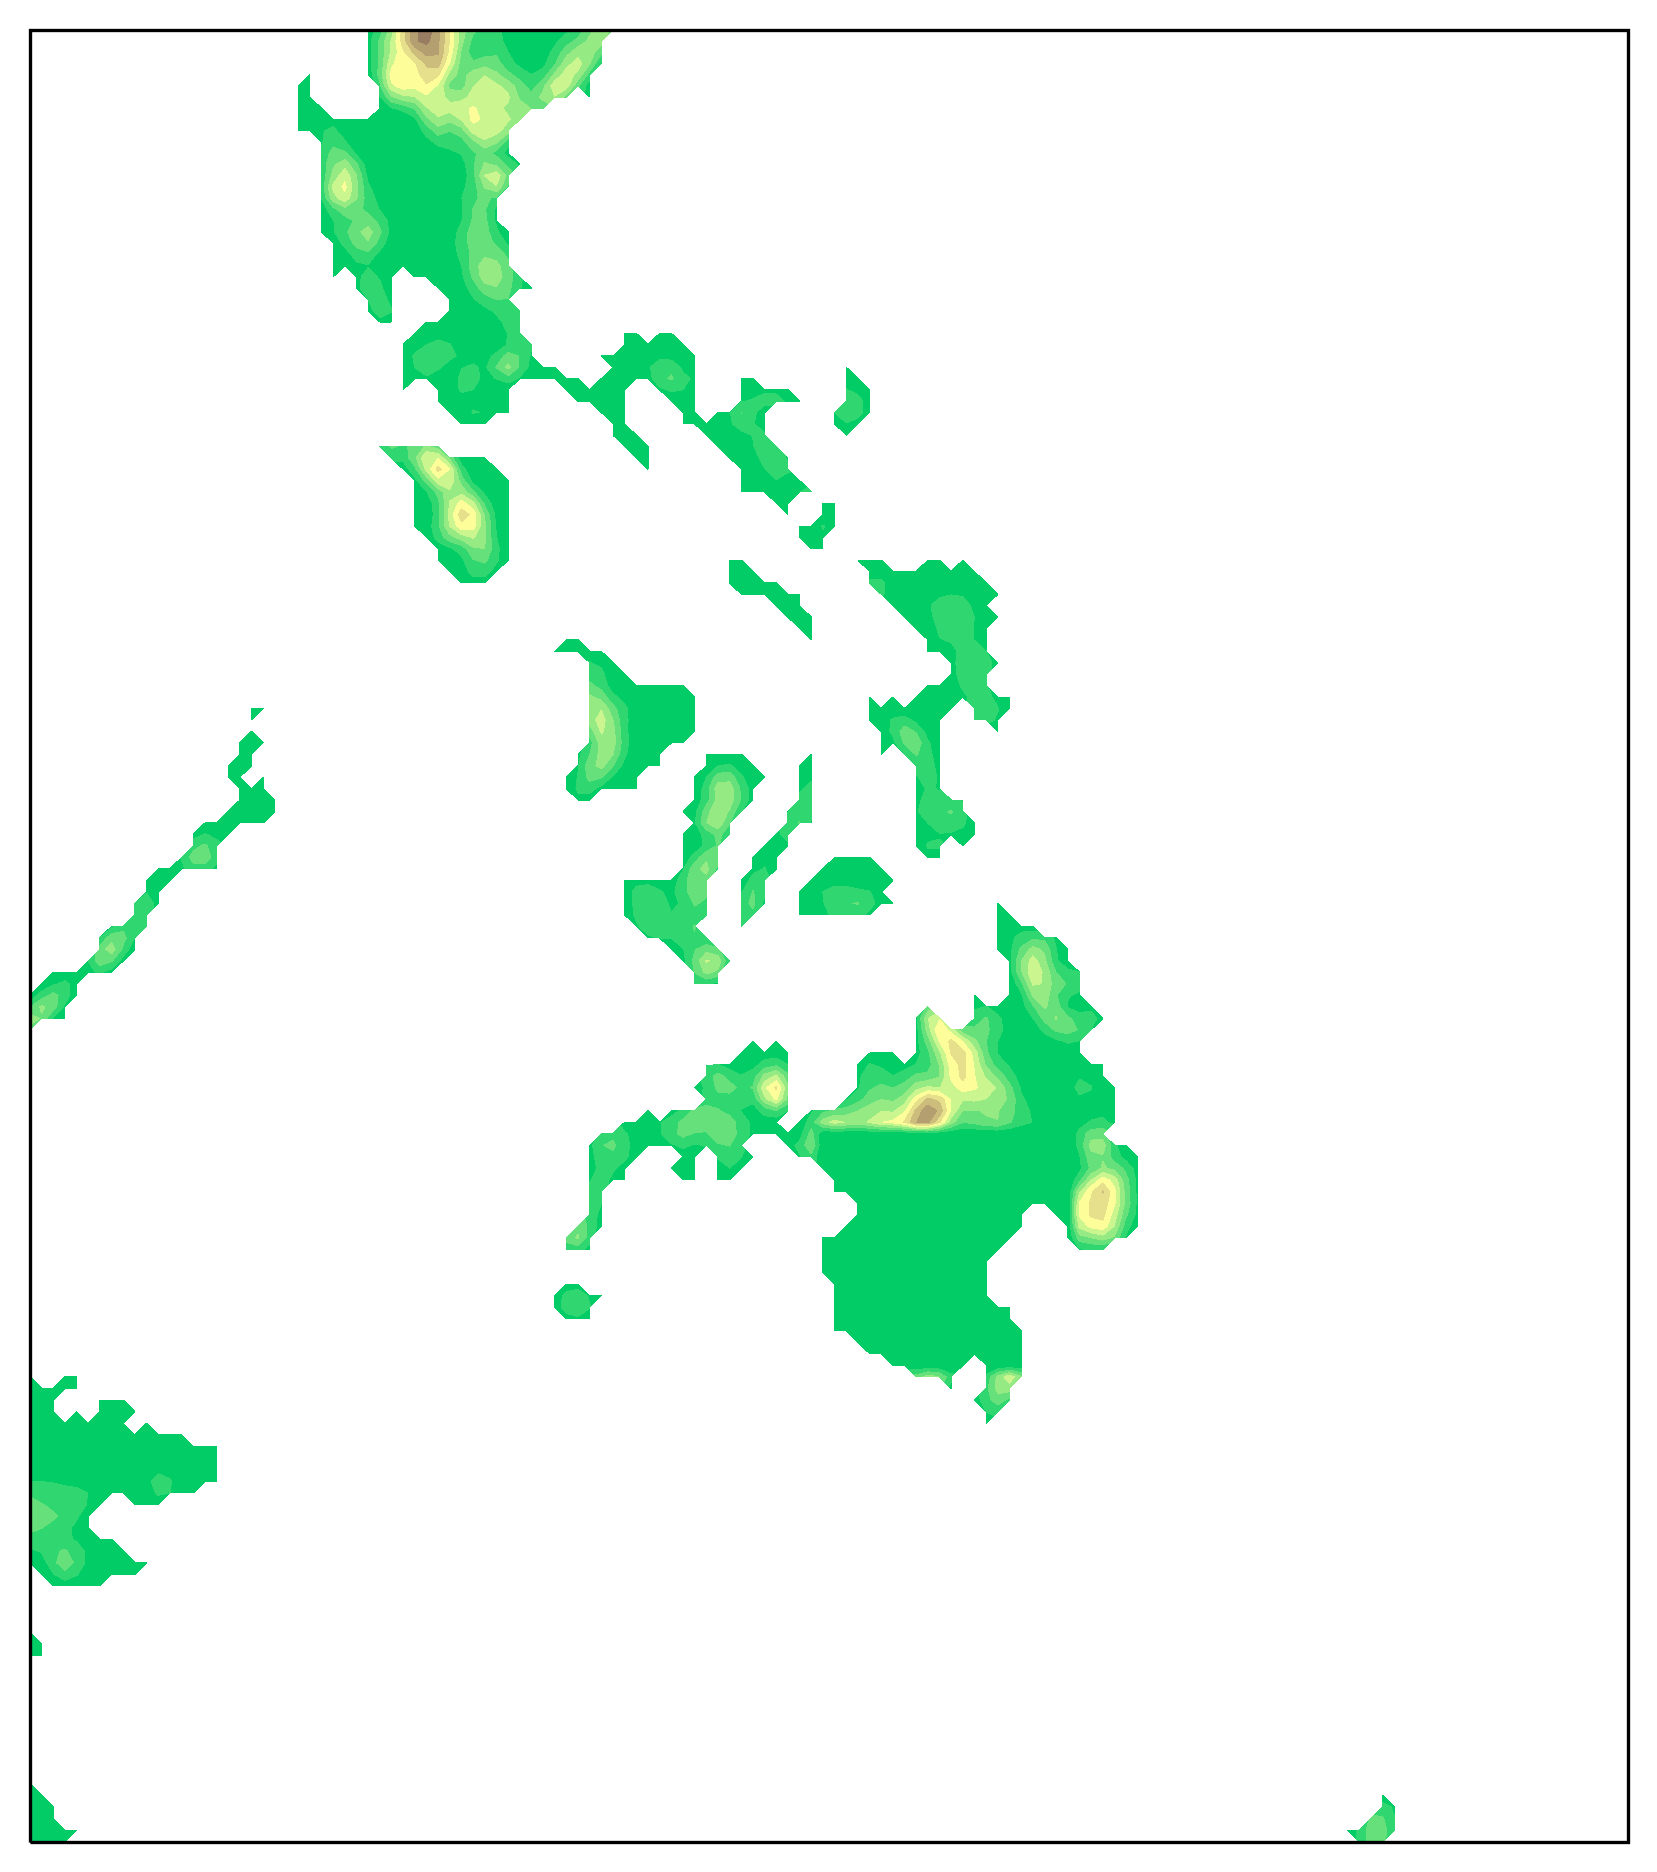

In [15]:
# these lines are not necessary to modify your terrain
# this part is for visual confirmation

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
gs = gridspec.GridSpec(nrows=1, ncols=1)
    
ax = plt.subplot(gs[0,0], projection=proj)
lons = xlon[0,:]
lats = xlat[0,:]
topog = hgt[0,:]
cmap = plt.get_cmap('terrain')
new_cmap = truncate_colormap(cmap, 0.25, 0.9)

nc_new = maskoceans(lons,lats,topog)
vmin=0
vmax=2800
v = np.linspace(vmin, vmax, 15, endpoint=True)
norm = mpl.colors.BoundaryNorm(v, new_cmap.N)

a = ax.contourf(lons, lats, nc_new, v, cmap=new_cmap, norm=norm, vmin=vmin, vmax=vmax)
ax.add_feature(coast, edgecolor='black', alpha=1)
lon_formatter = LongitudeFormatter(number_format='.1f',
                                   degree_symbol='',
                                   dateline_direction_label=True,
                                   zero_direction_label=True) # Add to include N-E labels in ticks
lat_formatter = LatitudeFormatter(number_format='.1f',
                                   degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
loc = plticker.MultipleLocator(base=2) 
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

cax = fig.add_axes([.8, 0.2742, 0.018, 0.457]) # l, b, w, h
cb = fig.colorbar(a, cax=cax)
cb.set_label('Surface Elevation (m)', size=12, labelpad=6)
